### 1. 머신러닝 개요

#### 1-1. 머신러닝이란 ?

- 머신러닝 : 기계 스스로 데이터를 학습하여 서로 다른 변수 간의 관계를 찾아 나가는 과정
- 예측, 분류, 군집 알고리즘 등으로 분류됨   
_ex ) 경제지표 예측, 고객 분류, 비슷한 소비패턴 가진 고객 유형 군집으로 묶기_

#### 머신러닝의 학습 종류(4)
**- 지도학습 ( 분류 / 회귀 )**  
`올바른 정답(레이블)이 있는 데이터 집합이 주어지는 경우`   
    1. 회귀 : 연속적 값 찾기 ( 예측 ) by 예측변수 이용 ( feature )   
    2. 분류 : 미리 정의된 여러 클래스 레이블 중 하나 예측    
        - 이진분류 (yes/no)   
        - 다중분류( 개, 고양이, 사자 들 중 고양이 분류하기 )      
`사용알고리즘 :  KNN, 선형회귀 ,SVM 등`   

__- 비지도학습 ( 군집 / 시각화 )__   
    - 레이블이 존재하지 않는 데이터 집합이 주어지는 경우   
    1. 군집 : 유사한 것들끼리 하나의 클러스터로 만드는 것   
    2. 시각화       
        `사용 알고리즘 :  K-means, 계층군집, PCA 등`
        
**- 준지도학습  ( 지도학습 + 비지도 학습 )**    
    - ex ) 사진에서 얼굴 인식하여 자동으로 태그해주는 기능
    
**- 강화학습**   
    - ex ) 알파고   
    - 에이전트가 계속 환경을 탐색하면서 자신의 상태를 인지하고 올바른 행동을 할 때마다 보상을 줌.    
    그 보상을 극대화 할 수 있도록 에이전트를 움직이게 하는 것 ( 예측 X 먼저 행동하고 판단 ! )   
    - 반복학습을 통해 그 사이의 상관관계 파악 ( 주로 게임에 사용됨 )

#### 1-3. 머신러닝 프로세스

1. 데이터 분석 전 컴퓨터 알고리즘이 이해할 수 있는 형태로 데이터 변환 필요  
    분석 대상에 관해 수집한 관측값을 속성 기준으로 정리
    -> 판다스 이용해 데이터프레임으로 정리하는 과정
    - 열 : 속성 나타내는 변수
    - 행 : 하나의 관측값
2. 여러 속성(변수) 간 관계 분석하여 결과 예측하는 모형 학습을 통해 찾기
    - 훈련데이터(train) : 모형 학습에 사용하는 데이터
    - 검증데이터(test) : 학습 마친 모형 예측 능력 평가하기 위한 데이터
3. 모형의 예측 능력 평가
4. 평가 결과를 바탕으로 최종 모형 확정 -> 문제 해결에 적용

#### 일반화

- Training 데이터와 Input 데이터가 달라져도 똑같은 성능으로 출력하기 위한 목적
- Training 데이터로 모델링

일반화가 제대로 처리되지 않을 경우 →
**과대적합 / 과소적합**   
    1. 과대적합   
        - Training 데이터로 모델 학습 시 정확도가 높지만, input 데이터 사용시 그 정확도에 미치지 못했을 때    
        `→ Training 데이터 양 늘리기,정규화,Training 데이터 잡음 줄이기`           
    2. 과소적합   
        - 너무 단순해서 데이터의 내재된 구조를 학습하지 못하는 경우   
        `→ Parameter가 더 많은 복잡한 모델 선택, 제약 줄이기, 충분히 학습시키기 ( 조기종료 시점까지 )`

### 2. 회귀분석 

- 머신러닝 알고리즘 중 비교적 이해가 쉽고, 널리 활용됨.
- 가격, 매출, 주가, 환율 등 연속 변수를 예측하는데 주로 활용
- 종속변수/예측변수 : 모형이 예측하고자 하는 목표
- 독립변수/설명변수 : 예측을 위해 모형이 사용하는 속성

##### 2-1. 단순회귀분석 

- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘
- 대표적 지도학습 유형
- 훈련 데이터를 이용해 직선의 기울기와 y절편을 반복학습을 통해 찾는다.     
  **=> x,y에 대한 정보를 가지고 최적의 일차 방정식의 계수 a,b 찾는 과정 (y=ax+b)**

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 데이터 준비
df = pd.read_csv('./data/auto-mpg.csv', header = None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
                'acceleration','model year','origin','name']

# 데이터 살펴보기
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [2]:
# Step2 데이터 탐색

# 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
# 통계 요약 정보 확인
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
# horsepower 열 자료형 변경
print(df['horsepower'].unique()) # 고유값 확인

df['horsepower'].replace('?', np.nan, inplace=True) # '?' -> np.nan 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float') # 문자열 -> 실수형

print(df.describe)

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']
<bound method NDFrame.describe of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0        

In [5]:
# Step 3 속성 선택

# 예측 목표인 종속 변수가 될 mpg와 독립 변수로 사용할 후보로 cylinders,horsepower,weight 포함
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


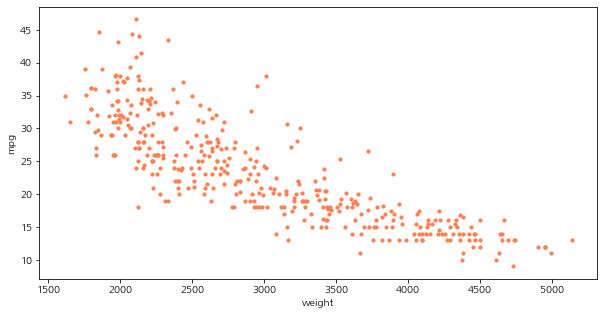

In [6]:
# 변수 간 선형관계 산점도로 확인 - matplotlib
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()

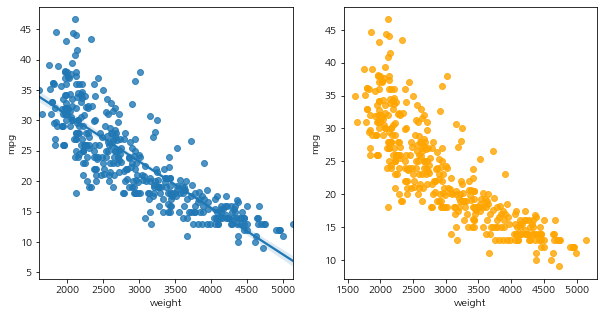

In [7]:
# 변수 간 선형관계 산점도로 확인 - seaborn
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight',y='mpg', data=ndf, ax=ax1) # 회귀선 표시
sns.regplot(x='weight',y='mpg', data=ndf, ax=ax2, fit_reg=False, color='orange') # 회귀선 미표시

plt.show()

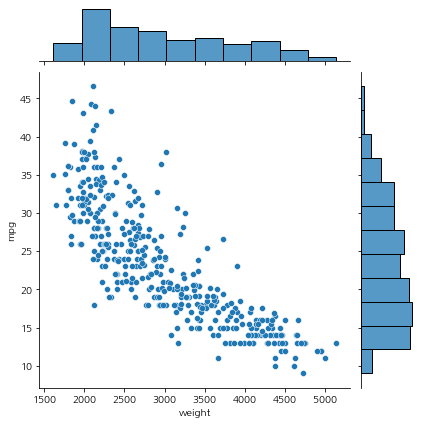

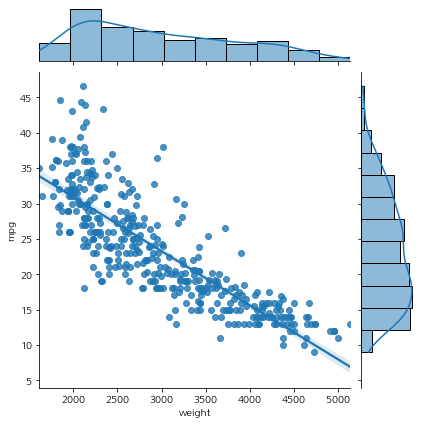

In [8]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight',y='mpg', data=ndf) # 회귀선 없음
sns.jointplot(x='weight', y='mpg', data=ndf, kind='reg') # 회귀선 표시
plt.show()

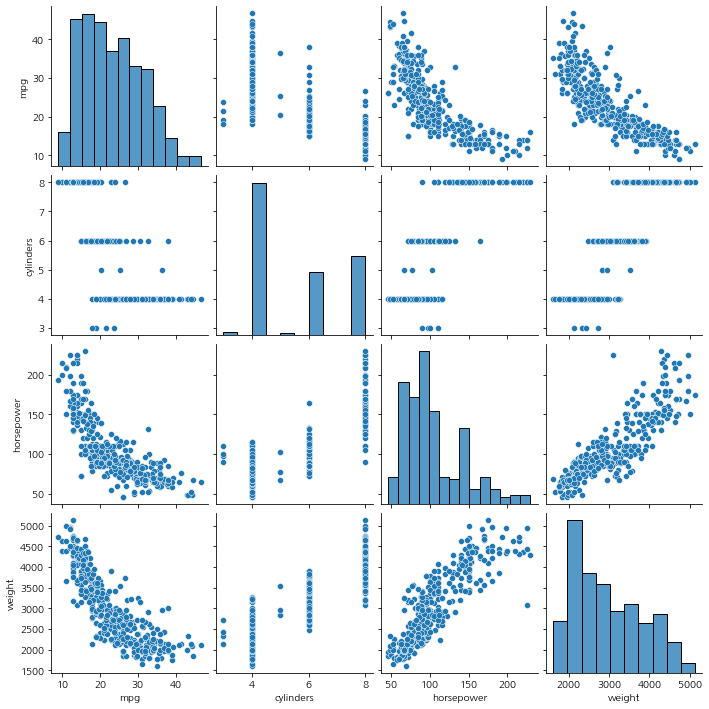

In [9]:
# seabron pair plot으로 두 변수 간 모든 경우의 수 그리기
grid_ndf = sns.pairplot(ndf)
plt.show()

In [10]:
# Step 4 데이터셋 구분 - 훈련용/검증용

# 속성 선택 - mpg와 선형관계를 보이는 horsepower, weight 선택
# weight를 독립 변수로 선택, 데이터 7:3의 비율로 분할
X = ndf[['weight']]
y = ndf[['mpg']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 10)

print('train data 개수 : ', len(X_train))
print('test data 개수 : ', len(X_test))

train data 개수 :  274
test data 개수 :  118


In [11]:
# Step 5 모형 학습 및 검증
# 단순회귀분석 모형 만들기 - sklearn

from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습 마친 모형에 test data 적용하여 결정계수 계산
r_square = lr.score(X_test, y_test)
print(r_square)
# 결정계수 값이 클수록 모형의 예측능력이 좋다고 판단

0.6822458558299325


In [12]:
# 회귀식 기울기
print('기울기 a : ', lr.coef_)
# 회귀식 y절편
print('y절편 b : ', lr.intercept_)

기울기 a :  [[-0.00775343]]
y절편 b :  [46.71036626]


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


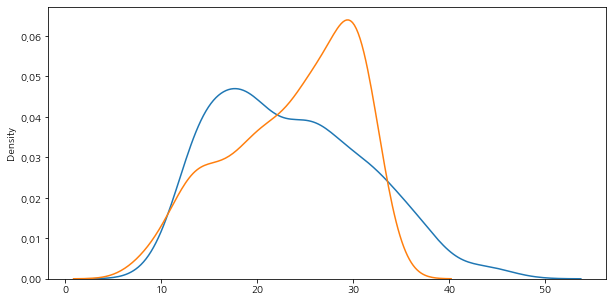

In [13]:
# 모형에 전체 X 데이터 입력해 예측한 값 y_hat을 실제 y와 비교
y_hat = lr.predict(X)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
# 실제 값은 왼쪽으로 편항되어 있고, 예측값은 반대로 오른쪽으로 편중되는 경향을 보임
# 독립 변수외 종속변수 사이의 선형관계가 있지만, 모형의 오차를 더 줄일 필요가 있어 보임.
# 앞의 산점도를 통해 직선보다는 곡선 형태의 모형이 적합함을 알 수 있음 
# -> 비선형 회귀분석을 통해 모형의 정확도 높이기

##### 2-2. 다항회귀분석

- 독립 변수 X와 종속 변수 Y 사이 선형의 상관관계가 있지만, 직선보다 곡선으로 설명하는 것이 더 적합한 경우
- 보다 복잡한 곡선 형태의 회귀선 표현 가능
- 2차함수 이상의 다항 함수를 이용해 두 변수 간의 선형관계 설명하는 알고리즘

In [14]:
# 데이터 준비 -> 2-1 의 데이터 활용
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


In [15]:
# 비선형회귀분석 모형 - sklearn 사용

# 모듈 가져오기
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree = 2) # 2차항 객체 생성
X_train_poly = poly.fit_transform(X_train) # X_train 데이터 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [16]:
# train data로 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습 마친 모형에 test data 적용해 결정계수 계산
X_test_poly = poly.fit_transform(X_test) # X_test 데이터 2차항으로 변형
r_square = pr.score(X_test_poly, y_test)
r_square
# 단순회귀분석에 비해 결정계수가 높아짐 (0.68 -> 0.71)

0.7087009262975685

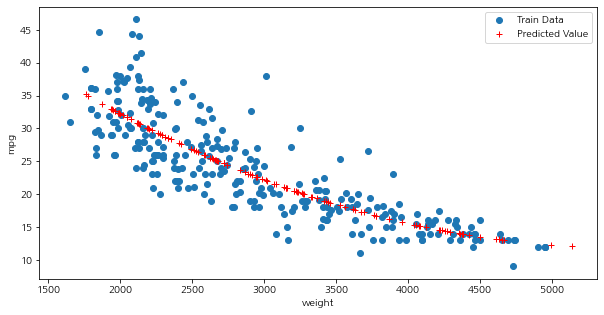

In [17]:
# train data의 산점도와 test data로 예측한 회귀선 그래프로 출력
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label='Train Data') # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
# 단순회귀분석에 비해 데이터의 패턴을 더욱 잘 설명한다고 할 수 있음.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


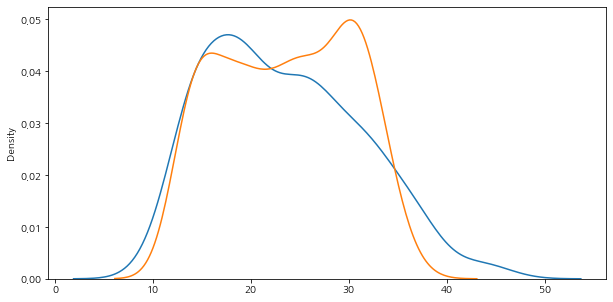

In [18]:
# 모형에 전체 X 데이터 입력하여 예측한 값 y_hat을 실제 값 y와 비교
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
# 데이터가 어느 한쪽으로 편향되는 경향이 상당히 감소한 것을 알 수 있다. 

#### 2-3. 다중회귀분석

- 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우
- Y = b + a1X1 + a2X2 + ... + anXn
- 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아 모형 완성함
- 종속 변수에 대해 실제 데이터를 아는 상태에서 학습하므로 지도학습으로 분류됨

In [19]:
# 데이터 셋 구분 - 훈련용/검증용

# 속성 선택
X = ndf[['cylinders', 'horsepower', 'weight']] # 독립 변수 X1, X2, X3
y = ndf['mpg'] # 종속 변수 Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


In [20]:
# 모형 학습 및 검증

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# 훈련 데이터로 모형 학습
lr.fit(X_train, y_train)

# 학습 마친 모형에 test data 적용해 결정계수 계산
r_squre = lr.score(X_test, y_test)
print(r_squre)

# 회귀식 기울기
print('X 변수의 계수 a: ', lr.coef_)
# 회귀식 y절편
print('상수항 b: ', lr.intercept_)

0.6939048496695597
X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]
상수항 b:  46.41435126963405


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


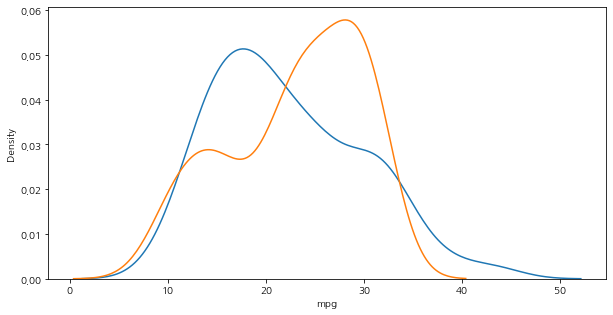

In [21]:
# 예측값과 실제값 비교
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test, hist=False, label='y_test')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
# 단순회귀분석과 비교했을 때 데이터가 어느 한쪽으로 편향되는 경향은 남아있지만
# 그래프의 첨도가 약간 누그러진 것을 볼 수 있다.